<a href="https://colab.research.google.com/github/milkap5/Pre-Procesamiento-de-DataSet-y-funcionamiento-Algoritmos-knn-k-nearest-neighbors-y-Decision-Tree-DT-/blob/master/TPI_IAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importar el dataset
df_cardio = pd.read_csv('/content/data_cardiovascular_risk.csv')
print("DataFrame original 'sucio':")
df_cardio


DataFrame original 'sucio':


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [ ]:
#diagnostico
print("--Informacion general del DataFrame--")
df_cardio.info()


--Informacion general del DataFrame--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 

In [ ]:
print("\n--Resumen estadistico (solo columnas numericas) --")
print(df_cardio.describe())


--Resumen estadistico (solo columnas numericas) --
                id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.1581

In [ ]:
print("\n--Conteo de valores nulos por columna --")
print(df_cardio.isnull().sum())


--Conteo de valores nulos por columna --
id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [ ]:
#imprimir primeras filas
df_cardio.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
print(f'Numero de filas duplicadas:  {df_cardio.duplicated().sum()}')

Numero de filas duplicadas:  0


In [ ]:
print(f'Numero de filas duplicadas:  {df_cardio.duplicated(subset=["id"]).sum()}')

Numero de filas duplicadas:  0


In [ ]:
#eliminar las columnas irrelevantes 'id' y 'education'
df_cardio_limpio = df_cardio.drop(columns=['id','education'])
print('Dataframe sin las columnas irrelevantes')
df_cardio_limpio.head()

Dataframe sin las columnas irrelevantes


,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# calcular mediana entre fumadores que si informaron su consumo
median_cigs = df_cardio_limpio.loc[df_cardio_limpio['is_smoking'] == 'YES', 'cigsPerDay'].median()
print('Mediana de fumadores que informaron su consumo diario: ')
median_cigs

Mediana de fumadores que informaron su consumo diario: 


20.0

In [ ]:
# imputar faltantes solo en fumadores
df_cardio_limpio.loc[(df_cardio_limpio['is_smoking'] == 'YES') & (df_cardio_limpio['cigsPerDay'].isna()), 'cigsPerDay'] = median_cigs



In [ ]:
#imputación de 0 en las filas vacias en la columna de 'BPMeds'
df_cardio_limpio['BPMeds'] = df_cardio_limpio['BPMeds'].fillna(0)


In [ ]:
#imputación de la mediana en las filas vacías de la columna 'totChol'

df_cardio_limpio['totChol'] = df_cardio_limpio['totChol'].fillna(df_cardio_limpio['totChol'].median())

In [ ]:
#imputamos la mediana en 'BMI'
df_cardio_limpio['BMI'] = df_cardio_limpio['BMI'].fillna(df_cardio_limpio['BMI'].median())

In [ ]:
#imputando la mediana a las personas que son diabeticos
df_cardio_limpio['glucose'] = df_cardio_limpio.groupby('diabetes')['glucose'].transform(
    lambda x: x.fillna(x.median())
)

In [ ]:
df_cardio_limpio.head(15)

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,61,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,36,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,41,F,YES,20.0,0.0,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,55,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,78.0,0


In [ ]:
#imputando la mediana a la unica fila faltante de 'heartRate'
df_cardio_limpio['heartRate'] = df_cardio_limpio['heartRate'].fillna(df_cardio_limpio['heartRate'].median())


In [ ]:
cholesterol_stats = df_cardio_limpio['totChol'].describe()
print(cholesterol_stats)

count    3390.000000
mean      237.039823
std        44.994205
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64


In [ ]:
#calculamos el IQR
Q1 = df_cardio_limpio['totChol'].quantile(0.25)
Q3 = df_cardio_limpio['totChol'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


print(f"Outliers < {lower_limit:.2f} o > {upper_limit:.2f}")

Outliers < 119.00 o > 351.00


In [ ]:
#filtramos los outliers
outliers = df_cardio_limpio[(df_cardio_limpio['totChol'] < lower_limit) | (df_cardio_limpio['totChol'] > upper_limit)]
print(f"Cantidad de outliers: {len(outliers)}")

Cantidad de outliers: 43


In [ ]:
#reemplazo los outliers por la mediana
mediana_chol = df_cardio_limpio['totChol'].median()

df_cardio_limpio.loc[
    (df_cardio_limpio['totChol'] < lower_limit) |
    (df_cardio_limpio['totChol'] > upper_limit),
    'totChol'
] = mediana_chol

In [ ]:
#chequeo que los outliers ahora estan dentro del rango
print("Nuevo rango de 'totChol':")
print(df_cardio_limpio['totChol'].describe())

Nuevo rango de 'totChol':
count    3390.000000
mean      235.191740
std        40.826802
min       119.000000
25%       206.000000
50%       234.000000
75%       262.000000
max       351.000000
Name: totChol, dtype: float64


In [ ]:
df_cardio_limpio.head(3390)

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,M,YES,3.0,0.0,0,1,0,234.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,M,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # para dividir los datos
from sklearn.tree import DecisionTreeClassifier # el modelo de arbol de Decisión
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # para evaluar el modelo
from sklearn.tree import plot_tree # para visualizar el arbol

# variables predictoras (X) y variable objetivo (y)
X = df_cardio_limpio.drop(columns=['TenYearCHD'])  # Quitamos id y target
y = df_cardio_limpio['TenYearCHD']

# convertir variables categoricas a numericas
X = pd.get_dummies(X, drop_first=True)

# dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Datos de entrenamiento:", X_train.shape[0])
print("Datos de prueba:", X_test.shape[0])

# crear y entrenar el arbol de decisión
modelo_dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
modelo_dt.fit(X_train, y_train)
print("\nModelo entrenado correctamente.")

Datos de entrenamiento: 2712
Datos de prueba: 678

Modelo entrenado correctamente.


In [32]:
# evaluando el modelo
y_pred = modelo_dt.predict(X_test)
print("\nPrecision del modelo:", round(accuracy_score(y_test, y_pred), 3))



Precision del modelo: 0.853


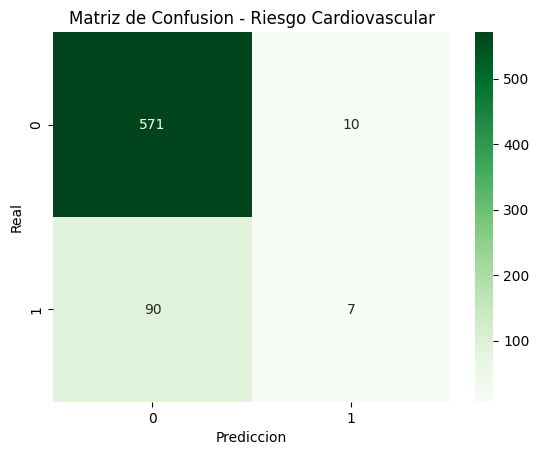

In [33]:
# matriz de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.title("Matriz de Confusion - Riesgo Cardiovascular")
plt.show()



Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       581
           1       0.41      0.07      0.12        97

    accuracy                           0.85       678
   macro avg       0.64      0.53      0.52       678
weighted avg       0.80      0.85      0.81       678



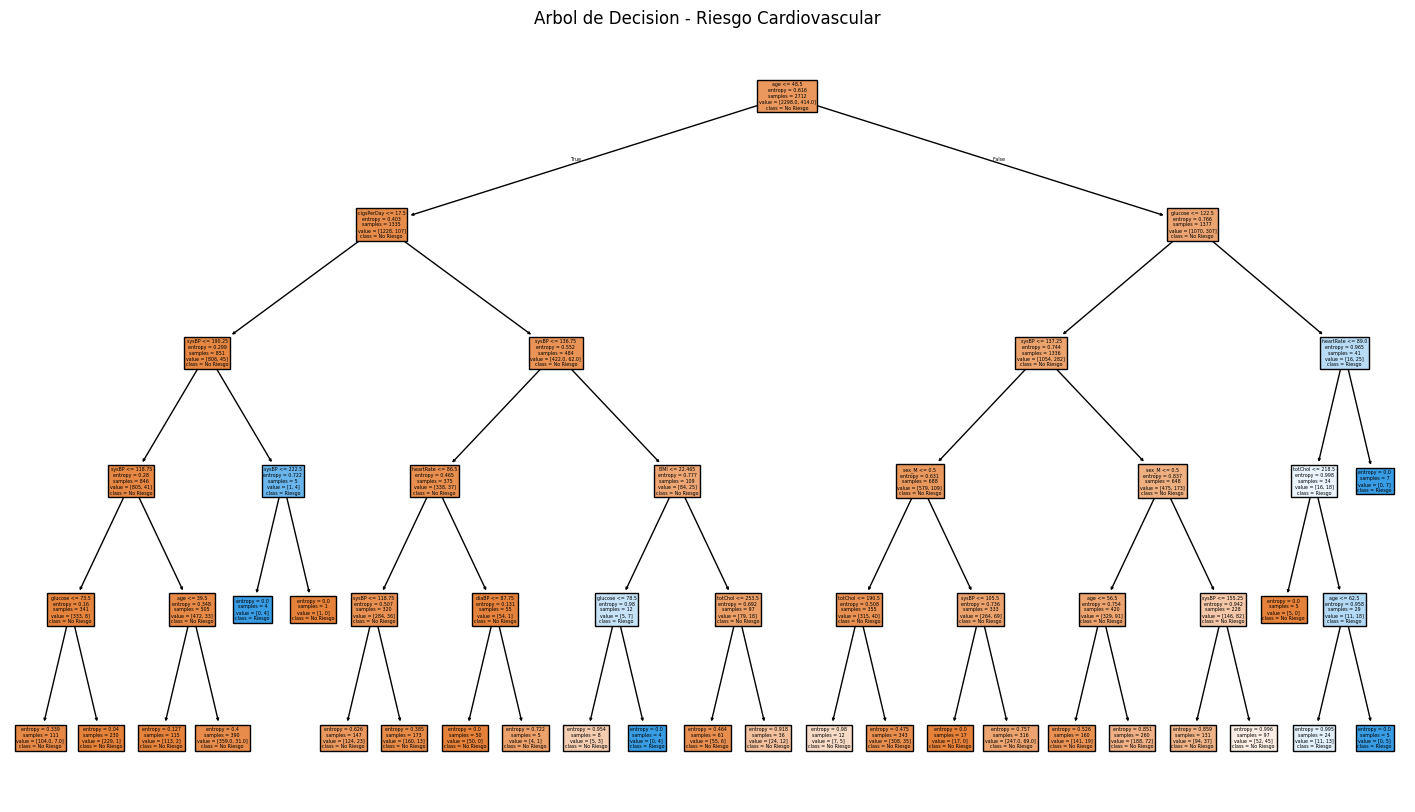

In [34]:
# reporte detallado
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

# visualizar el arbol
plt.figure(figsize=(18,10))
plot_tree(modelo_dt, filled=True, feature_names=X.columns, class_names=['No Riesgo', 'Riesgo'])
plt.title("Arbol de Decision - Riesgo Cardiovascular")
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as pl

# eliminamos la columna 'tenyearchd' porque no aporta al modelo
X = df_cardio_limpio.drop(columns=[ 'TenYearCHD'])
y = df_cardio_limpio['TenYearCHD']


# convertir variables categóricas ('sex', 'is_smoking') a numericas

X['sex'] = X['sex'].map({'M': 1, 'F': 0})
X['is_smoking'] = X['is_smoking'].map({'YES': 1, 'NO': 0})

# verificamos que no queden valores nulos
print("Valores nulos por columna:\n", X.isnull().sum())



Valores nulos por columna:
 age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64


In [36]:
# dividir en conjunto de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)

Tamaño de entrenamiento: (2373, 14)
Tamaño de prueba: (1017, 14)


In [37]:
# normalizar las variables

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# entrenar el modelo KNN

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scaled, y_train)

#realizar predicciones

y_pred = knn.predict(X_test_scaled)



Accuracy del modelo: 0.848

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       864
           1       0.43      0.04      0.07       153

    accuracy                           0.85      1017
   macro avg       0.64      0.51      0.49      1017
weighted avg       0.79      0.85      0.79      1017



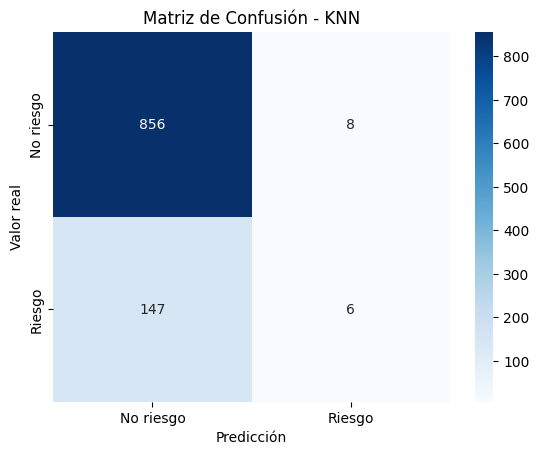

In [43]:
# evaluar el modelo

print("Accuracy del modelo:", round(accuracy_score(y_test, y_pred), 3))
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred))

# Matriz de confusion visual
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No riesgo', 'Riesgo'], yticklabels=['No riesgo', 'Riesgo'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - KNN')
plt.show()

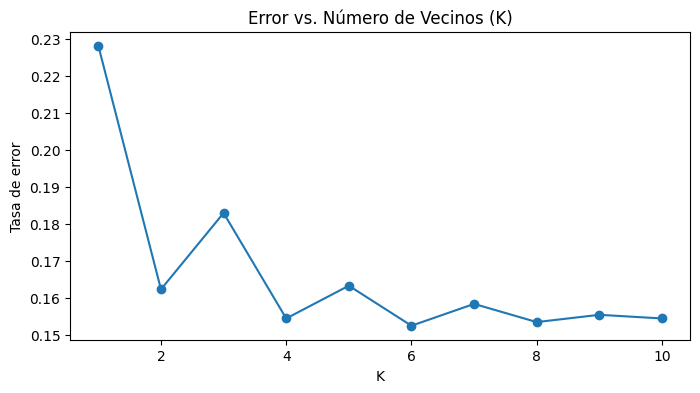

In [41]:
# buscar el mejor valor de K

error_rates = []

for k in range(1, 11):
    knn_test = KNeighborsClassifier(n_neighbors=k)
    knn_test.fit(X_train_scaled, y_train)
    y_pred_k = knn_test.predict(X_test_scaled)
    error = 1 - accuracy_score(y_test, y_pred_k)
    error_rates.append(error)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), error_rates, marker='o')
plt.title('Error vs. Número de Vecinos (K)')
plt.xlabel('K')
plt.ylabel('Tasa de error')
plt.show()